In [13]:
!pip install -q seaborn

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [89]:
df = 'https://drive.google.com/uc?export=download&id=19DIL99UGIzhPZQ_VDuyrDmGPvy5VMGAn'
column_names = ['station_key', 'full_name', 'latitude', 'longitude', 'daily_total',
                'day_of_week', 'public_holiday', 'school_holiday', 'hour_00', 
                'hour_01', 'hour_02', 'hour_03', 'hour_04', 'hour_05', 'hour_06', 
                'hour_07', 'hour_08', 'hour_09', 'hour_10', 'hour_11', 'hour_12',
                'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
                'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'congestion_threshold']

raw_dataset = pd.read_csv(df,
                          na_values='?', comment='\t',
                          skipinitialspace=True)

In [90]:
dataset = raw_dataset.copy()

pd.set_option("display.max_columns", None)
dataset.head()

,station_key,full_name,latitude,longitude,daily_total,day_of_week,public_holiday,school_holiday,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,congestion_threshold
0,57299,"Western Motorway, South of Ponds Road",-33.806267,150.922424,70880,Friday,False,False,863,602,503,604,855,1595,3052,3852,3948,3280,3266,3470,3874,4225,5049,5367,4759,5059,4182,3118,2010,1727,2965,2655,4294
1,56667,"Southern Cross Drive, East of Mill Pond Drive",-33.936520,151.198883,60571,Friday,False,False,173,112,85,123,380,1702,4315,4652,4018,3785,3473,3378,3209,3064,3136,3278,3601,3945,4005,3279,2363,1990,1660,845,2622
2,55414,"Western Distributor, South of Pyrmont Bridge Road",-33.873138,151.194107,54579,Saturday,False,False,1929,1508,896,631,688,483,905,1977,1878,2406,2900,3213,3301,3486,3446,3236,3017,2836,3029,3266,3227,2230,1952,2139,2589
3,56708,"Victoria Road, South of Robert Street",-33.867317,151.175568,48886,Friday,False,False,469,243,197,180,346,1099,3026,3891,3796,3394,2893,2638,2536,2542,2433,2587,2626,2743,3008,2540,1545,1345,1496,1313,2070
4,57516,"Western Motorway, South of Barker Street",-33.783550,150.765106,44912,Thursday,False,False,233,223,201,351,931,3050,4166,4589,3873,2816,2132,2124,2117,2117,2212,2490,2488,2471,1777,1306,1128,1076,694,347,1992


In [91]:
dataset.isna().sum()

station_key             0
full_name               0
latitude                0
longitude               0
daily_total             0
day_of_week             0
public_holiday          0
school_holiday          0
hour_00                 0
hour_01                 0
hour_02                 0
hour_03                 0
hour_04                 0
hour_05                 0
hour_06                 0
hour_07                 0
hour_08                 0
hour_09                 0
hour_10                 0
hour_11                 0
hour_12                 0
hour_13                 0
hour_14                 0
hour_15                 0
hour_16                 0
hour_17                 0
hour_18                 0
hour_19                 0
hour_20                 0
hour_21                 0
hour_22                 0
hour_23                 0
congestion_threshold    0
dtype: int64

In [92]:
dataset = dataset.dropna()
dataset = dataset.drop(['station_key', 'day_of_week', 'public_holiday', 'school_holiday', 'full_name', 'latitude', 'longitude', 'daily_total'], axis=1)


dataset.head()

,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,congestion_threshold
0,863,602,503,604,855,1595,3052,3852,3948,3280,3266,3470,3874,4225,5049,5367,4759,5059,4182,3118,2010,1727,2965,2655,4294
1,173,112,85,123,380,1702,4315,4652,4018,3785,3473,3378,3209,3064,3136,3278,3601,3945,4005,3279,2363,1990,1660,845,2622
2,1929,1508,896,631,688,483,905,1977,1878,2406,2900,3213,3301,3486,3446,3236,3017,2836,3029,3266,3227,2230,1952,2139,2589
3,469,243,197,180,346,1099,3026,3891,3796,3394,2893,2638,2536,2542,2433,2587,2626,2743,3008,2540,1545,1345,1496,1313,2070
4,233,223,201,351,931,3050,4166,4589,3873,2816,2132,2124,2117,2117,2212,2490,2488,2471,1777,1306,1128,1076,694,347,1992


In [93]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

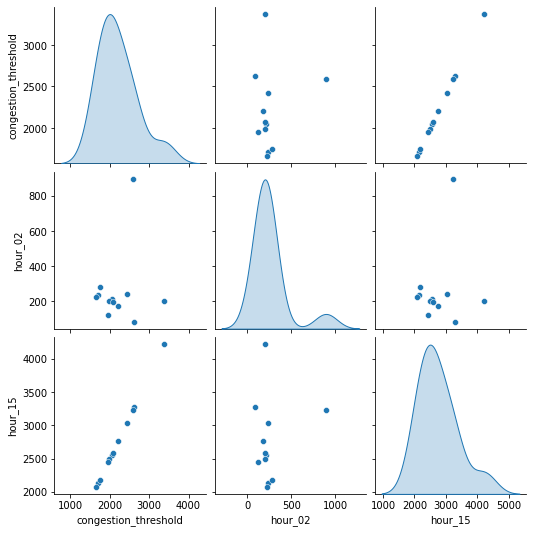

In [94]:
sns.pairplot(train_dataset[['congestion_threshold', 'hour_02', 'hour_15']], diag_kind='kde')

In [95]:
train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
hour_00,12.0,507.666667,479.227661,173.0,232.50,392.5,466.75,1929.0
hour_01,12.0,372.416667,376.127507,112.0,223.75,248.5,289.00,1508.0
hour_02,12.0,256.500000,208.108582,85.0,191.75,208.0,238.25,896.0
hour_03,12.0,258.333333,145.696031,97.0,165.75,248.5,304.50,631.0
hour_04,12.0,461.833333,226.610131,112.0,344.25,473.0,556.25,931.0
hour_05,12.0,1228.750000,785.562349,193.0,636.75,1242.0,1569.25,3050.0
hour_06,12.0,2532.083333,1219.014614,711.0,1626.25,2432.5,3295.00,4315.0
hour_07,12.0,3254.583333,958.488721,1977.0,2356.50,3067.0,3996.50,4652.0
hour_08,12.0,3087.500000,711.248646,1878.0,2520.75,3022.0,3799.75,4018.0
hour_09,12.0,2650.333333,506.508249,2100.0,2319.50,2599.0,2776.25,3785.0


In [96]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('congestion_threshold')
test_labels = test_features.pop('congestion_threshold')

In [97]:
train_dataset.describe().transpose()[['mean', 'std']]


,mean,std
hour_00,507.666667,479.227661
hour_01,372.416667,376.127507
hour_02,256.500000,208.108582
hour_03,258.333333,145.696031
hour_04,461.833333,226.610131
hour_05,1228.750000,785.562349
hour_06,2532.083333,1219.014614
hour_07,3254.583333,958.488721
hour_08,3087.500000,711.248646
hour_09,2650.333333,506.508249


In [98]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [100]:
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[ 507.66666  372.41666  256.5      258.33334  461.83334 1228.75
  2532.0833  3254.5833  3087.5     2650.3333  2424.4167  2371.6667
  2350.25    2420.1667  2528.3333  2749.9167  2849.9167  2936.75
  2698.5     2226.9167  1632.25    1302.9166  1155.6666   933.9167 ]]


In [101]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 173  112   85  123  380 1702 4315 4652 4018 3785 3473 3378 3209 3064
  3136 3278 3601 3945 4005 3279 2363 1990 1660  845]]

Normalized: [[-0.73 -0.72 -0.86 -0.97 -0.38  0.63  1.53  1.52  1.37  2.34  2.36  2.12
   1.82  1.27  1.08  0.9   1.12  1.34  1.77  1.38  1.19  1.74  1.33 -0.2 ]]


In [102]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [103]:
linear_model.predict(train_features[:10])


array([[ 0.6794716],
       [ 1.2890819],
       [-0.4185824],
       [ 1.343854 ],
       [-1.3237994],
       [-2.1603625],
       [ 1.7663345],
       [-1.059799 ],
       [-1.090574 ],
       [ 1.0121932]], dtype=float32)

In [104]:
linear_model.layers[1].kernel


<tf.Variable 'dense/kernel:0' shape=(24, 1) dtype=float32, numpy=
array([[ 0.26762107],
       [ 0.3832663 ],
       [-0.00870737],
       [-0.3585134 ],
       [-0.2232587 ],
       [ 0.02461645],
       [-0.04463425],
       [-0.24280976],
       [ 0.38759854],
       [ 0.33996674],
       [-0.37601042],
       [-0.20889607],
       [-0.09884989],
       [ 0.30299416],
       [ 0.36687157],
       [ 0.04078272],
       [-0.40535054],
       [ 0.414906  ],
       [ 0.09224924],
       [ 0.44222733],
       [-0.31716466],
       [-0.21120942],
       [ 0.34553358],
       [ 0.46146384]], dtype=float32)>

In [105]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [106]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.26 s, sys: 141 ms, total: 4.4 s
Wall time: 6.07 s
